In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import math


Bad key text.latex.unicode in file /home/guskhojra@GU.GU.SE/anaconda3/envs/rasa_eval/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/guskhojra@GU.GU.SE/anaconda3/envs/rasa_eval/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/guskhojra@GU.GU.SE/anaconda3/envs/rasa_eval/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 

In [2]:
NLU_NAME = ['watson', 'luis', 'snips', 'rasa-sklearn', 'rasa-diet']
COLORS = ['lightcoral', 'yellowgreen', 'deepskyblue', 'purple', 'orchid', 'orangered','mediumturquoise', 'darkorange', 'gold']
NUM_INTENTS = 10
VERSION = 8

# No. Ranks vs Confidence Scores

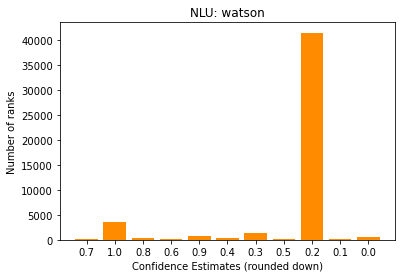

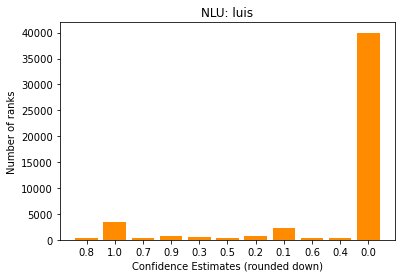

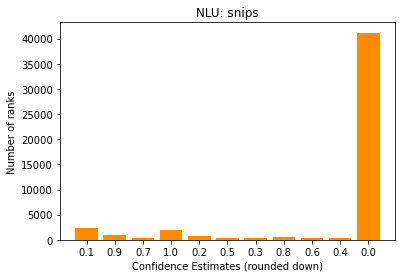

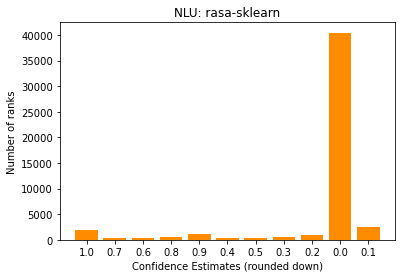

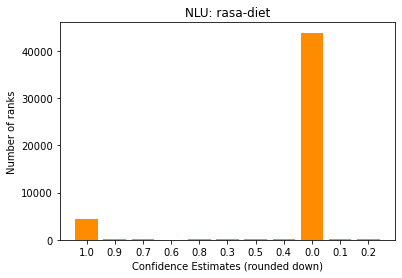

In [5]:
for i, nlu in enumerate(NLU_NAME): 
    # load nlu results
    nlu_result_file = '../results/' + nlu + '/v' + str(VERSION) + '/' + nlu + '_split_' + str(1) + '_results_v' + str(VERSION) + '.json'
    with open(nlu_result_file) as json_file:
        data = json.load(json_file)
    num_examples_per_confidence = {}
    all_confidences = []
    for rank in range(NUM_INTENTS):
#         if rank == 0:
        for test in data:
            # get confidence
            if test['text'] != '':
                predicted_intent_conf = round(test['intent_ranking'][rank]['confidence'], 1) # rasa

            all_confidences.append(predicted_intent_conf)
    
    ########### indent this back if you want to get stats across all ranks ##########
    counts = dict(Counter(all_confidences))  
    num_examples_per_confidence = {key:value for key, value in counts.items()}
    confidences = list(num_examples_per_confidence.keys())
    num_examples = list(num_examples_per_confidence.values())

    plt.bar(range(len(num_examples_per_confidence)), num_examples, tick_label=confidences, color=COLORS[7])
    plt.title('NLU: '+ nlu )
    plt.xlabel("Confidence Estimates (rounded down)")
    plt.ylabel("Number of ranks")
    plt.show()
    ################################################################################